In [1]:
import pandas as pd
import panel as pn
import panelify

pn.extension()

In [2]:
df = pd.read_csv("HiRes-CESM-analysis.csv", dtype={"time_coarsen_len": "Int16"})
df.head()

,path,casename,plot_type,varname,spatial_op,time_coarsen_len,z_t,depth_level,z_t_150m,log_10,time_range,time
0,s3://ncar-cesm-pop-test/images/g.e22.G1850ECO_...,g.e22.G1850ECO_JRA_HR.TL319_t13.003,global-timeseries,CaCO3_FLUX_100m,integrate,12,NaN,-9999.0,NaN,False,NaN,NaN
1,s3://ncar-cesm-pop-test/images/g.e22.G1850ECO_...,g.e22.G1850ECO_JRA_HR.TL319_t13.003,global-timeseries,DpCO2,average,12,NaN,-9999.0,NaN,False,NaN,NaN
2,s3://ncar-cesm-pop-test/images/g.e22.G1850ECO_...,g.e22.G1850ECO_JRA_HR.TL319_t13.003,global-timeseries,FG_CO2,integrate,12,NaN,-9999.0,NaN,False,NaN,NaN
3,s3://ncar-cesm-pop-test/images/g.e22.G1850ECO_...,g.e22.G1850ECO_JRA_HR.TL319_t13.003,global-timeseries,NH4,average,12,500.0,500.0,NaN,False,NaN,NaN
4,s3://ncar-cesm-pop-test/images/g.e22.G1850ECO_...,g.e22.G1850ECO_JRA_HR.TL319_t13.003,global-timeseries,NHx_SURFACE_EMIS,integrate,12,NaN,-9999.0,NaN,False,NaN,NaN


In [3]:
storage_options = {"anon": True}
timeseries = panelify.create_dashboard(
    keys=[
        "casename",
        "varname",
        "depth_level",
        "spatial_op",
        "time_coarsen_len",
        "log_10",
    ],
    df=df.loc[df.plot_type == "global-timeseries"],
    path_column="path",
    storage_options=storage_options,
)
timestep = panelify.create_dashboard(
    keys=["casename", "varname", "depth_level", "time", "log_10"],
    df=df.loc[df.plot_type == "timestep-global-map"],
    path_column="path",
    storage_options=storage_options,
    column_widget_types={"time": "discrete_slider"},
)
histogram = panelify.create_dashboard(
    keys=["casename", "varname", "depth_level", "time_range", "log_10"],
    df=df.loc[df.plot_type == "histogram"],
    path_column="path",
    storage_options=storage_options,
    column_widget_types={"time_range": "discrete_slider"},
)

canvas = panelify.Canvas(
    {
        "Timestep": timestep.view,
        "Timeseries": timeseries.view,
        "Histogram": histogram.view,
    }
)

Row
    [0] Column(background='#659dbd')
        [0] Markdown(str)
        [1] Row
            [0] Spacer(width=10)
            [1] Markdown(str)
            [2] Spacer(width=10)
            [3] Markdown(str)
    [1] Row
        [0] Tabs
            [0] ParamMethod(method, name='Timestep')
            [1] ParamMethod(method, name='Timeseries')
            [2] ParamMethod(method, name='Histogram')
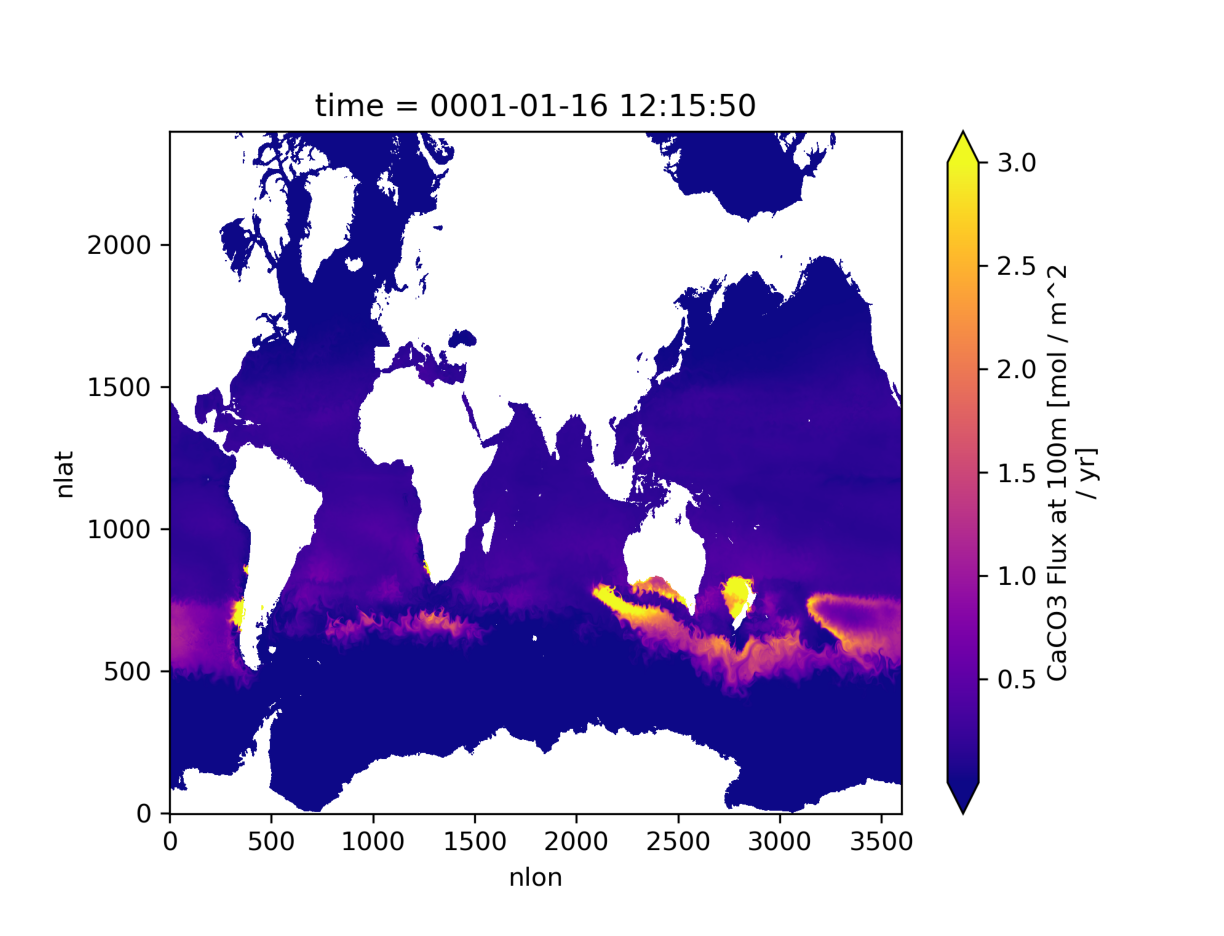
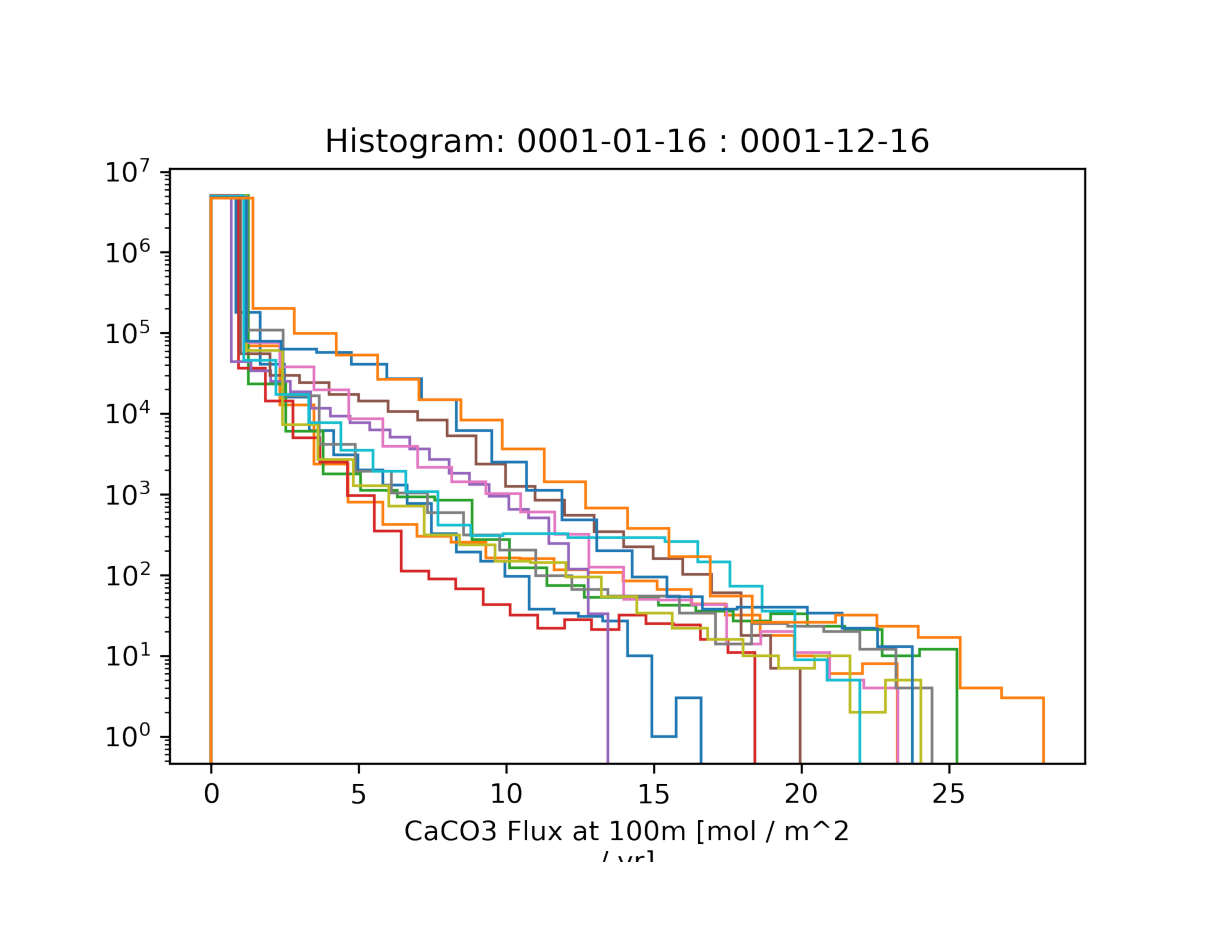
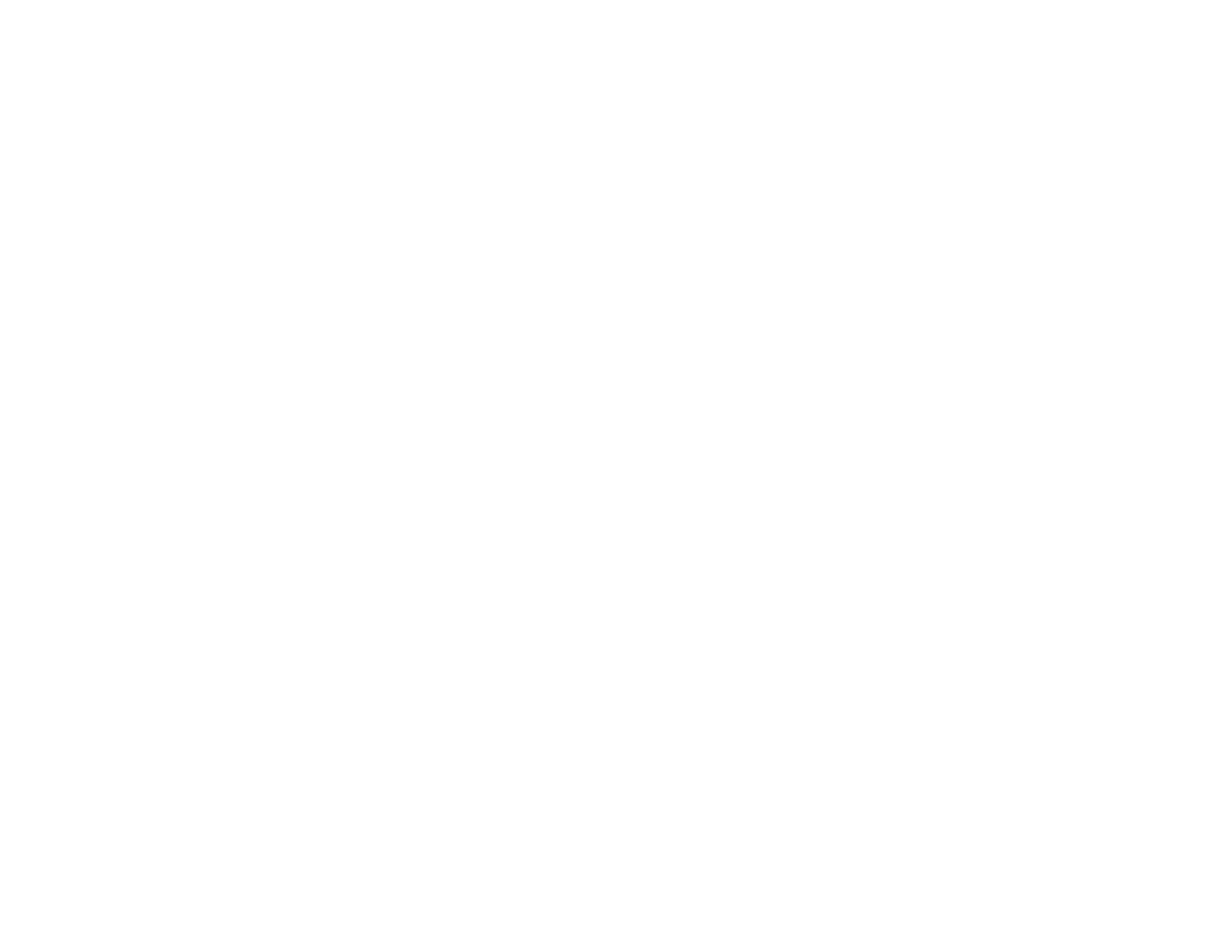

In [4]:
hv_logo = '<a href="https://holoviz.org"><img src="https://holoviz.org/assets/holoviz-logo-stacked.svg" width=80></a>'
thumbnail = '<a href="https://github.com/marbl-ecosys/"><img src="https://raw.githubusercontent.com/NCAR/cesm-lens-aws/master/thumbnail.png" width=80 height=80></a>'
menu_background = "#659dbd"
menu_text = "<div><p>0.1 degree POP / CICE run with ocean BGC</p><br><br><p><a href='https://github.com/marbl-ecosys/HiRes-CESM-analysis'>HiRes-CESM analysis repo</a></p><p><a href='https://github.com/andersy005/HiRes-CESM-dashboard'>HiRes-CESM dashboard repo</a></p></div><br><br>"
menu = pn.Column(
    menu_text,
    pn.Row(
        pn.Spacer(width=10),
        pn.Pane(thumbnail),
        pn.Spacer(width=10),
        pn.Pane(hv_logo),
    ),
    background=menu_background,
)

dashboard = pn.Row(menu, canvas.show())
dashboard.servable("HiRes-CESM Diagnostics Dashboard")